In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import scipy as sc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

In [39]:
#DATA PREPROCESSING
df=pd.read_csv(r"Project_1-cardio_train.csv")
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [40]:
!pip install pandas

In [41]:
df.index

RangeIndex(start=0, stop=70000, step=1)

In [42]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [43]:
df.shape

(70000, 13)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [45]:
df['age_years']=df['age']//365
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47


In [46]:
df.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,61
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0,56


In [47]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,52.840671
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.766774
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000


In [48]:
df.isnull()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
69996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
69997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
69998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [49]:
df.isnull().sum()

,0
id,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0


In [50]:
df['cardio'].value_counts()

,count
cardio,
0,35021
1,34979


In [51]:
x=df.drop(columns='cardio',axis=1)
y=df['cardio']
print(x)

          id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

       smoke  alco  active  age_years  

In [52]:
print(y)

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64


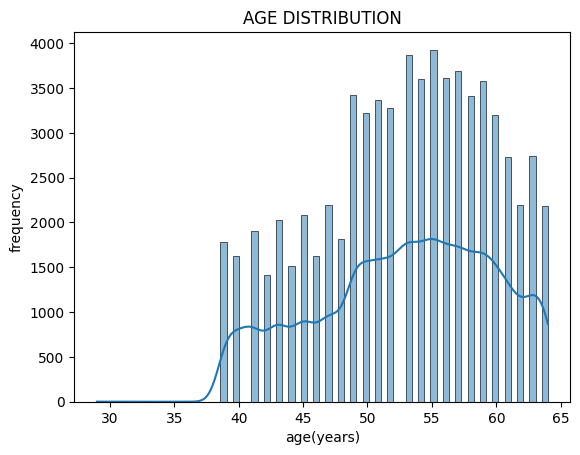

In [53]:
#DATA VISUALIZATION

 ##Histplot
sns.histplot(df['age_years'],kde=True)
plt.title('AGE DISTRIBUTION')
plt.xlabel('age(years)')
plt.ylabel('frequency')
plt.show()

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio',
       'age_years'],
      dtype='object')


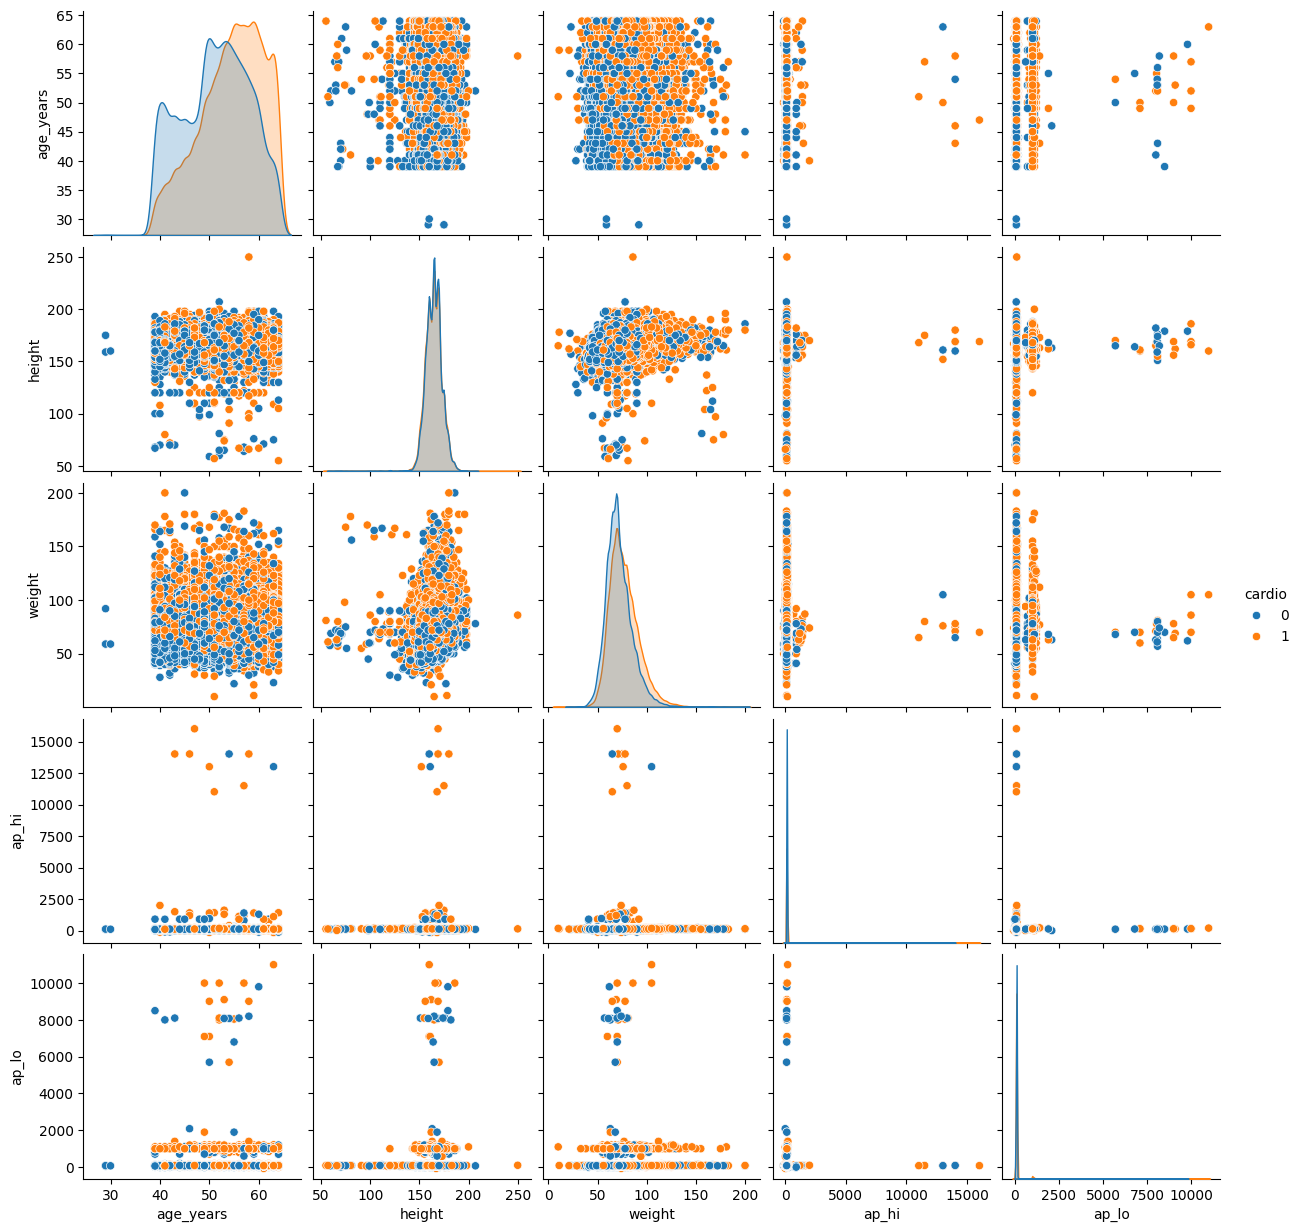

In [54]:
#pairplot
print(df.columns)
columns_to_plot=['age','height','weight','ap_hi','ap_lo','cardio']
missed_columns=[col for col in columns_to_plot if col not in df.columns]
if missed_columns:
    print(f"these are the missed columns in df:{missed_columns}")
else:
    df['age_years']=df['age']//365
    columns_to_plot[0]= 'age_years'
sns.pairplot(df[columns_to_plot],hue='cardio')
plt.show()


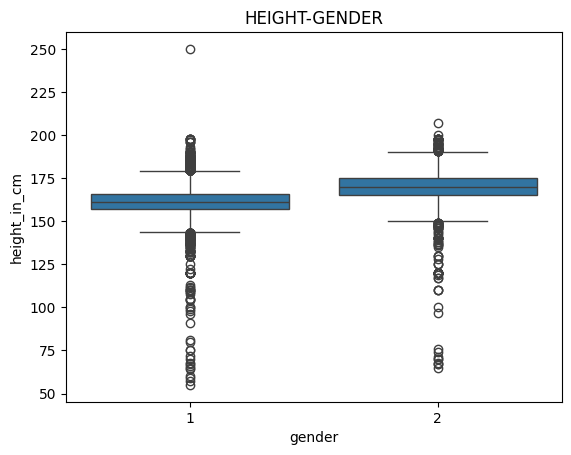

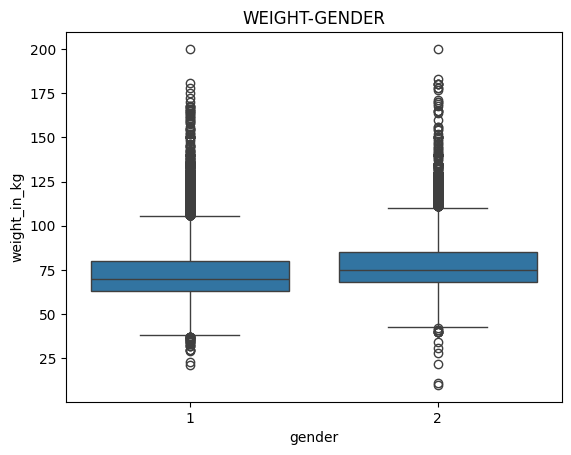

In [55]:
#Boxplot
sns.boxplot(x='gender',y='height',data=df)
plt.title('HEIGHT-GENDER')
plt.xlabel('gender')
plt.ylabel('height_in_cm')
plt.show()

sns.boxplot(x='gender',y='weight',data=df)
plt.title('WEIGHT-GENDER')
plt.xlabel('gender')
plt.ylabel('weight_in_kg')
plt.show()




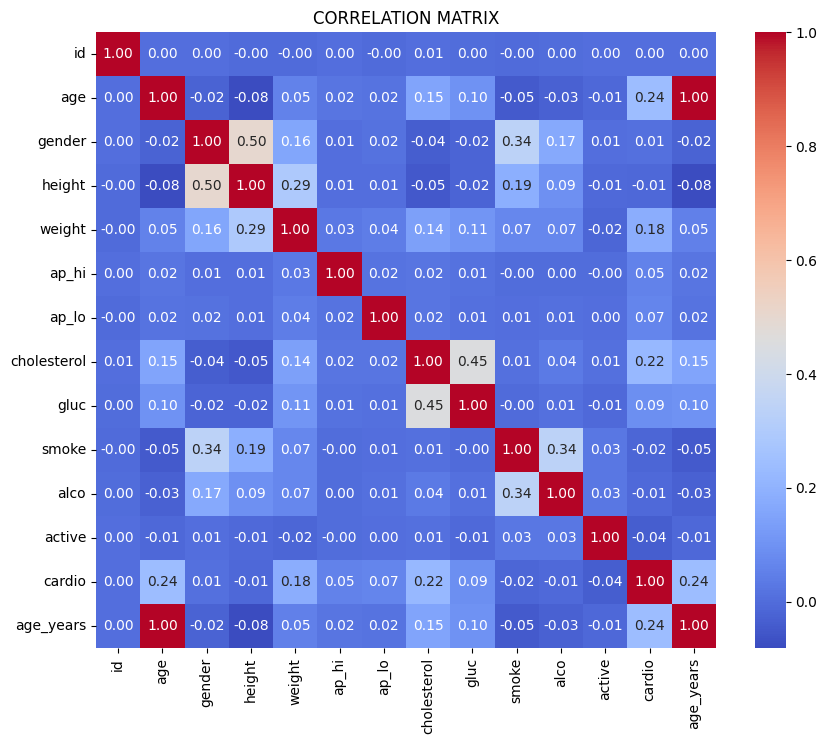

In [56]:
#Correlation Matrix
corr=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('CORRELATION MATRIX')
plt.show()

In [57]:
#MACHINE LEARNING MODELS

In [58]:
#splitting data into traindata and testdata
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [59]:
print(x.shape,x_train.shape,x_test.shape)

(70000, 13) (56000, 13) (14000, 13)


In [60]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [61]:
#K-Nearest Neighbor
KNN_model=KNeighborsClassifier()
KNN_model.fit(x_train,y_train)
y_prdct_KNN=KNN_model.predict(x_test)
accuracy_KNN=accuracy_score(y_test,y_prdct_KNN)
print(f"KNN Accuracy: {accuracy_KNN:.2f}")


KNN Accuracy: 0.62


In [62]:
#Support Vector Machines
SVM_model=SVC()
SVM_model.fit(x_train,y_train)
y_prdct_SVM=SVM_model.predict(x_test)
accuracy_SVM=accuracy_score(y_test,y_prdct_SVM)
print(f"SVM Accuracy: {accuracy_SVM:.2f}")

SVM Accuracy: 0.73


In [63]:
#LogisticREgression
LR_model=LogisticRegression(max_iter=1000)
LR_model.fit(x_train,y_train)
y_prdct_LR=LR_model.predict(x_test)
accuracy_LR=accuracy_score(y_test,y_prdct_LR)
print(f"LogisticRegression Accuracy:{accuracy_LR:.2f}")

LogisticRegression Accuracy:0.73


In [64]:
#decision trees
DT_model=DecisionTreeClassifier()
DT_model.fit(x_train,y_train)
y_prdct_DT=DT_model.predict(x_test)
accuracy_DT=accuracy_score(y_test,y_prdct_DT)
print(f"Decision Tree Accuracy:{accuracy_DT:.2f}")


Decision Tree Accuracy:0.63


In [65]:
#Random Forest
RF_model=RandomForestClassifier()
RF_model.fit(x_train,y_train)
y_prdct_RF=RF_model.predict(x_test)
accuracy_RF=accuracy_score(y_test,y_prdct_RF)
print(f"Random Forest Accuracy:{accuracy_RF:.2f}")


Random Forest Accuracy:0.72


In [66]:
#Building Machine Learning Model
SVM_model=SVC(kernel='linear',random_state=2)
SVM_model.fit(x_train,y_train)
y_prdct=SVM_model.predict(x_test)
accuracy = accuracy_score(y_prdct,y_test)
print(f" SVM Accuracy on test data:{accuracy:.2f}")

 SVM Accuracy on test data:0.73


In [67]:
print("Classification Report:")
print(classification_report(y_test,y_prdct))

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.81      0.75      7029
           1       0.77      0.64      0.70      6971

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.72     14000
weighted avg       0.73      0.73      0.72     14000



In [68]:
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_prdct))

Confusion Matrix:
[[5725 1304]
 [2524 4447]]
